# Analysis_KMeans Core 

## Import and Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
filename = ('Data/cust_seg.csv')
df = pd.read_csv(filename)

## Explore Data

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


* 850 rows, 10 columns
* Missing data in Defaulted column

In [4]:
ml_df = df.copy()

In [5]:
ml_df.duplicated().sum()

0

* No duplicates found

In [6]:
ml_df.isna().sum()

Unnamed: 0           0
Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

Missing 150 from Defaulted column


In [7]:
ml_df['Defaulted'].value_counts()
# Will impute with mode as column is binary

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [8]:
ml_df['Edu'].value_counts()

1    460
2    235
3    101
4     49
5      5
Name: Edu, dtype: int64

In [9]:
ml_df.describe(include='number')

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,424.50000,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,0.00000,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,212.25000,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,424.50000,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,636.75000,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,849.00000,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [10]:
ml_df.drop(columns =['Unnamed: 0', 'Customer Id'], axis=1, inplace=True)


In [11]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 53.2 KB


## Missing Data

In [12]:
ml_df['Defaulted'] = ml_df['Defaulted'].fillna(df['Defaulted'].mode()[0])

#https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

In [13]:
ml_df.isna().sum(0)

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [14]:
ml_df['Defaulted'].value_counts ()

0.0    667
1.0    183
Name: Defaulted, dtype: int64

## Scaling, KMeans and Inertia

In [15]:
# Instantiate Scaler
scaler = StandardScaler()

scaled_df = scaler.fit_transform(ml_df)

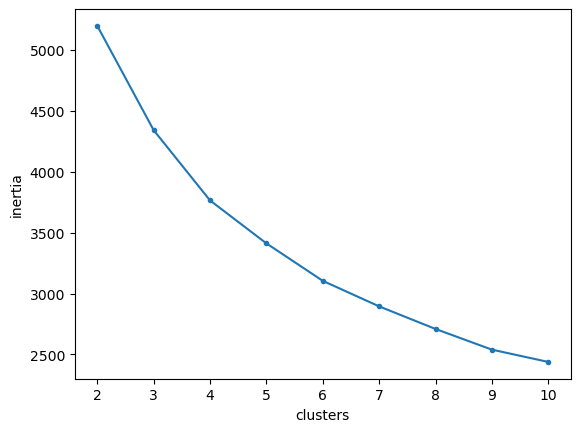

In [16]:
# Create an empty list of inertias

inertias = []

# Loop through K values between  and  and store the inertias in the list

for k in range (2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)

# Visualize scores

plt.plot(range(2,11), inertias, marker = '.');
plt.xlabel('clusters');
plt.ylabel('inertia');

*Does not have a real pronounced elbow.
* 4 would be the best option. 

## Silhouette Scores

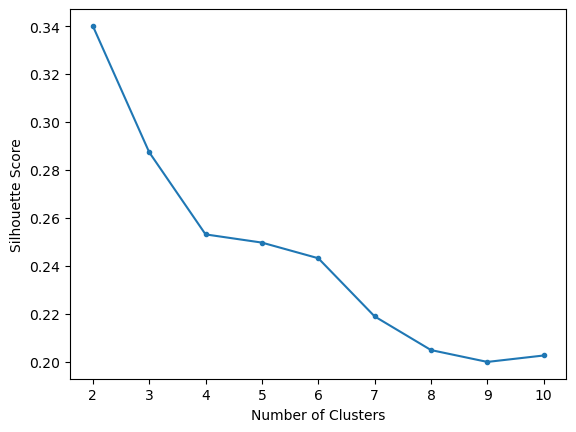

In [17]:
# Empty List    # Tried km.labels_ 

silhouette_scores = []

# For loop

for i in range(2,11):
    kmeans = KMeans(n_clusters =i, random_state=42)
    kmeans.fit(scaled_df)
    silhouette_scores.append(silhouette_score(scaled_df,kmeans.labels_))
    
# Visualize scores
plt.plot(range(2,11), silhouette_scores, marker = '.');
plt.xlabel('Number of Clusters');
plt.ylabel('Silhouette Score');

* While the highest score is 2, separating the customers into only 2 clusters would not be as beneficial or insightful for marketing. Exploring both 4 and 2 clusters below.  

In [18]:
# Looking into 4
kmeans = KMeans(n_clusters = 4, random_state=42)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)


0.2530737177201414

In [19]:
# Add clusters as a column in dataframe
ml_df['cluster'] = kmeans.labels_
ml_df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,41,2,6,19,0.124,1.073,0.0,6.3,0
1,47,1,26,100,4.582,8.218,0.0,12.8,3
2,33,2,10,57,6.111,5.802,1.0,20.9,2
3,29,2,4,19,0.681,0.516,0.0,6.3,0
4,47,1,31,253,9.308,8.908,0.0,7.2,1


In [20]:
# Group dataframe by cluster and aggregate by means values
cluster_groups = ml_df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,32.103774,1.646226,5.740566,30.865566,0.741219,1.614097,0.000000,7.934906
1,1,42.902439,2.292683,16.902439,135.146341,8.120659,12.959537,0.463415,19.536585
2,2,31.812121,1.878788,3.933333,31.442424,1.597758,2.793218,0.981818,14.041818
3,3,41.613636,1.600000,15.931818,72.081818,1.952014,4.274355,0.009091,9.834545


There isn't enough distinction between the clusters in more than one column. Will move forward with 2. 

In [21]:

kmeans = KMeans(n_clusters = 2, random_state=42)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)


0.3401172685946081

In [22]:
# Add clusters as a column in dataframe
ml_df['cluster2'] = kmeans.labels_
ml_df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster,cluster2
0,41,2,6,19,0.124,1.073,0.0,6.3,0,0
1,47,1,26,100,4.582,8.218,0.0,12.8,3,1
2,33,2,10,57,6.111,5.802,1.0,20.9,2,1
3,29,2,4,19,0.681,0.516,0.0,6.3,0,0
4,47,1,31,253,9.308,8.908,0.0,7.2,1,1


In [23]:
# Group dataframe by cluster and aggregate by means values
cluster_groups2 = ml_df.groupby('cluster2', as_index=False).mean()
cluster_groups2

,cluster2,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,0,32.968563,1.645210,6.492515,33.618263,0.937349,1.899054,0.215569,9.126796,0.883234
1,1,42.593407,1.950549,16.175824,94.598901,3.923890,7.408731,0.214286,14.006593,2.423077


Has more separation and distinction between values in each cluster in most columns. There are still similar values in the defaulted column though. Moving ahead with 2 clusters.

## Analysis

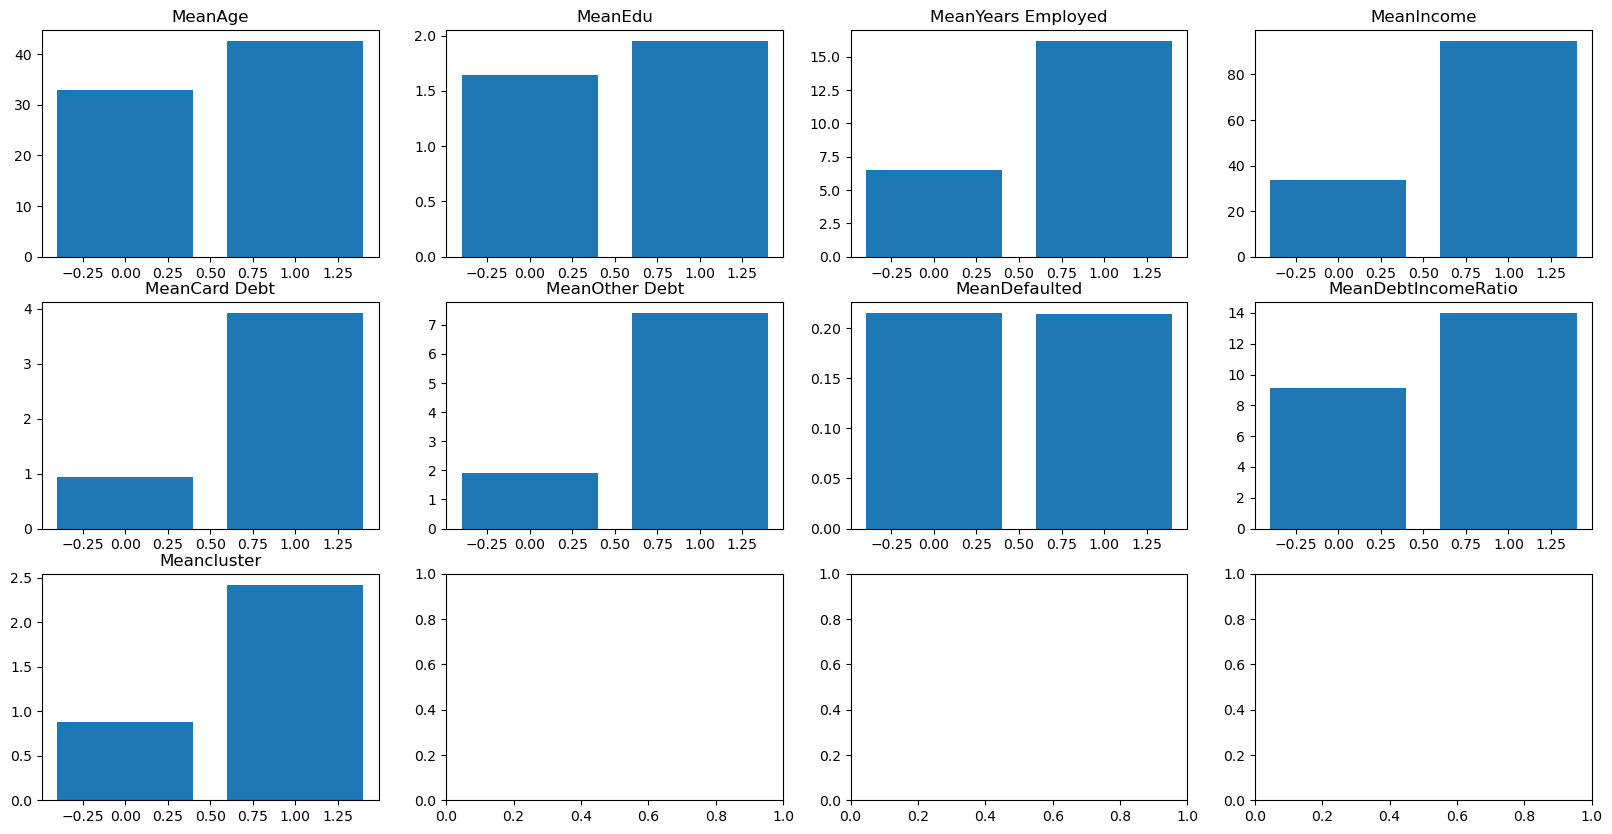

In [24]:
# Visualize means 

fig, axes = plt.subplots(3,4, figsize =(20,10))
axes = axes.ravel()
# Loop over columns and plot each in different figure
for i, col in enumerate(cluster_groups2.columns[1:]):
    axes[i].bar(cluster_groups2['cluster2'], cluster_groups2[col])
    axes[i].set_title(f'Mean{col}')

Cluster 0: The Less is More Crowd 
1) This cluster is moderately younger with slightly less education and has been in the workforce for significantly less time. Their income is also significantly lower yet they don't incur a lot of credit card debt or other debt and maintain less of a debt to income ratio. The major exception is they do default on their loans almost identically to those in the other cluster. 


Cluster 1: The More is More Group

2) These individuals are older with slightly more education and have been employed for many years, earning significantly more money. However, they have incurred a lot of credit card debt and other debt with a notable higher debt to income ratio. While they earn more, they appear to spend more. 

## Recommendations

1) Because the 'less crowd' has a lower income and overall debt, perhaps exploring a free (no annual fee) card, or ones with payment plans for items as an example to help manage spending could resonate with them. This group earns less and doesn't appear to readily jump into debt. Giving them features that are free and encourage them to use the cards like points, cash back, etc as an example is also worth exploring to see what will incentivize them. 

2) The More Group earns more and incurs more debt. They may be more willing to pay an annual fee for a card with status because they have higher income and education. On the flip side, exploring this groups interest in a balance transfer type card to manage or consolidate their other credit card debts may be appealing. 